In [2]:
import os 
import glob
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import pandas as pd

In [3]:
data_dir = '/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/'
files = glob.glob(os.path.join(data_dir, '*.txt'))


/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K590.txt
2020-09-11 11:30:50
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/D003.txt
2020-09-11 10:30:00
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K356.txt
2020-09-10 15:19:42
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K380.txt
2020-09-10 10:28:09
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M566.txt
2020-09-10 10:39:30
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M572.txt
2020-09-10 14:30:07
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K326.txt
2020-09-10 15:48:24
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/S017.txt
2020-09-11 12:11:30
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M535.txt
2020-09-10 14:34:59
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K367.txt
2020-09-10 10:30:18
/home/soontiensn/rep

2020-09-10 15:48:29
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/H1159.txt
2020-09-11 12:42:35
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/S007.txt
2020-09-10 14:17:08
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M588.txt
2020-09-10 11:05:23
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K387.txt
2020-09-10 11:06:00
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M569.txt
2020-09-10 10:40:25
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K357.txt
2020-09-10 14:47:23
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M573.txt
2020-09-10 11:24:08
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M501.txt
2020-09-11 11:32:18
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K327.txt
2020-09-10 15:35:58
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K360.txt
2020-09-10 14:29:46

2020-09-10 10:41:03
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/M529.txt
2020-09-10 15:35:32
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/S014.txt
2020-09-11 10:34:24
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K355.txt
2020-09-10 14:26:27
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K344.txt
2020-09-10 00:27:07
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/H1164.txt
2020-09-11 12:29:18
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/S013.txt
2020-09-11 10:28:07
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/V003.txt
2020-09-11 11:19:00
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K331.txt
2020-09-11 11:32:42
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/K319.txt
2020-09-10 15:58:30
/home/soontiensn/repos/drifters/TREX-collab/data/observations/L3/csv/S011.txt
2020-09-10 17:11:25

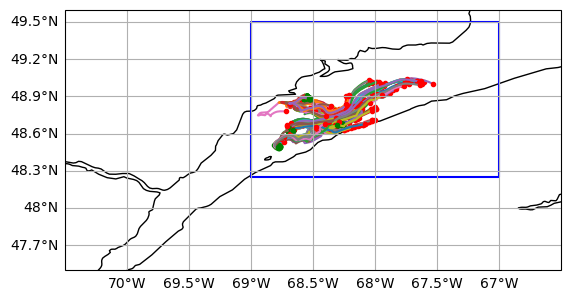

In [4]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()})
for f in files:
    print(f)
    d = pd.read_csv(f, skiprows=14, parse_dates=[0,])
    start=d['Date Time'][0]
    print(start)
    cap = start + datetime.timedelta(days=2)
    dsub = d[d['Date Time']<cap]
    dsub=dsub[dsub['atSea']==1]
    if len(dsub) >0:
        ax.plot(dsub['Longitude'], dsub['Latitude'], transform=ccrs.PlateCarree())
        ax.plot(dsub['Longitude'].values[0], dsub['Latitude'].values[0],'g.', transform=ccrs.PlateCarree())
        ax.plot(dsub['Longitude'].values[-1], dsub['Latitude'].values[-1],'r.', transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=['bottom', 'left'])
ax.set_xlim([-70.5,-66.5])
ax.set_ylim([47.5,49.6])
lon_min=-69
lon_max=-67
lat_min=48.25
lat_max=49.5
ax.plot([lon_min, lon_min, lon_max, lon_max, lon_min],
        [lat_min, lat_max, lat_max, lat_min, lat_min], 'b-', transform=ccrs.PlateCarree())